## Business problem

***Predict if a customer is happy or not based on the answers they give to questions asked.***

In [176]:
# Import libraries

import numpy as np
import pandas as pd 
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot
from sklearn.model_selection import train_test_split

# import models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report
# Load the dataset
df = pd.read_csv('C:/Users/Tooman/Desktop/ACME-HappinessSurvey2020.csv')

## Data Exploration

In [133]:
df.head()

,Y,X1,X2,X3,X4,X5,X6
0,0,3,3,3,4,2,4
1,0,3,2,3,5,4,3
2,1,5,3,3,3,3,5
3,0,5,4,3,3,3,5
4,0,5,4,3,3,3,5


In [134]:
print(df.shape)
print(df.size)

(126, 7)
882


In [135]:
df.describe()

,Y,X1,X2,X3,X4,X5,X6
count,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000
mean,0.547619,4.333333,2.531746,3.309524,3.746032,3.650794,4.253968
std,0.499714,0.800000,1.114892,1.023440,0.875776,1.147641,0.809311
min,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,4.000000,2.000000,3.000000,3.000000,3.000000,4.000000
50%,1.000000,5.000000,3.000000,3.000000,4.000000,4.000000,4.000000
75%,1.000000,5.000000,3.000000,4.000000,4.000000,4.000000,5.000000
max,1.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [136]:
# checks for missing values in the dataset
df.isnull().sum()

Y     0
X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
dtype: int64

In [137]:
print(df['X1'].unique()) #the unique values for the columns

[3 5 4 1]


In [138]:
print(df['X2'].unique()) #the unique values for the columns

[3 2 4 5 1]


In [139]:
print(df['X3'].unique()) #the unique values for the columns

[3 2 4 5 1]


In [140]:
print(df['X4'].unique()) #the unique values for the columns

[4 5 3 2 1]


In [141]:
print(df['X5'].unique()) #the unique values for the columns

[2 4 3 5 1]


In [142]:
print(df['X6'].unique()) #the unique values for the columns

[4 3 5 2 1]


In [143]:
df.corr()  #checks for the correlation of the variables against each other

,Y,X1,X2,X3,X4,X5,X6
Y,1.000000,0.280160,-0.024274,0.150838,0.064415,0.224522,0.167669
X1,0.280160,1.000000,0.059797,0.283358,0.087541,0.432772,0.411873
X2,-0.024274,0.059797,1.000000,0.184129,0.114838,0.039996,-0.062205
X3,0.150838,0.283358,0.184129,1.000000,0.302618,0.358397,0.203750
X4,0.064415,0.087541,0.114838,0.302618,1.000000,0.293115,0.215888
X5,0.224522,0.432772,0.039996,0.358397,0.293115,1.000000,0.320195
X6,0.167669,0.411873,-0.062205,0.203750,0.215888,0.320195,1.000000


<AxesSubplot:>

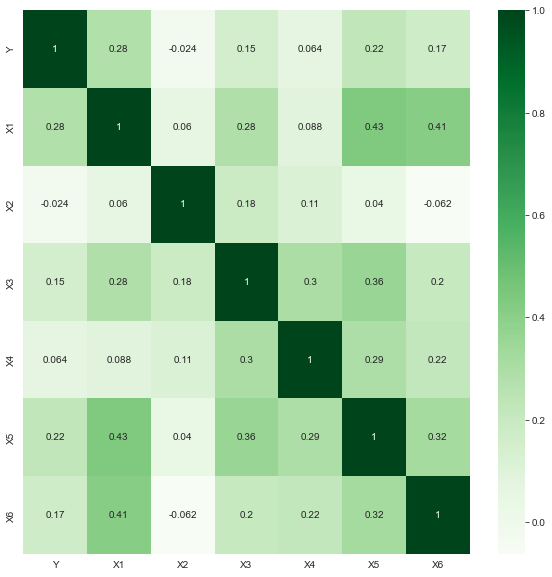

In [144]:
#plot correlation matrix heatmap
sns.set_style("whitegrid")
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, cmap='Greens')

C:\Users\Tooman\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


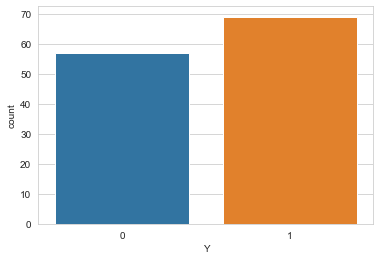

In [145]:
sns.countplot(df["Y"],orient="V")
plt.show()

In [146]:
df['Y'].value_counts()

1    69
0    57
Name: Y, dtype: int64

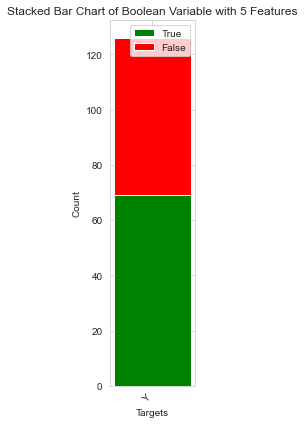

In [147]:
import matplotlib.pyplot as plt

# Sample data
Target = ['Y']
true_counts = [69]  # Counts of True values for each feature
false_counts = [57]  # Counts of False values for each feature

# Plotting
plt.figure(figsize=(2, 6))

# Stacked bar chart
plt.bar(Target, true_counts, color='green', label='True')
plt.bar(Target, false_counts, bottom=true_counts, color='red', label='False')

plt.xlabel('Targets')
plt.ylabel('Count')
plt.title('Stacked Bar Chart of Boolean Variable with 5 Features')
plt.legend()

plt.xticks(rotation=45, ha='right')
plt.tight_layout()

Feature: 0, Score: 0.18504
Feature: 1, Score: 0.16699
Feature: 2, Score: 0.19041
Feature: 3, Score: 0.14317
Feature: 4, Score: 0.17384
Feature: 5, Score: 0.14055


C:\Users\Tooman\AppData\Local\Temp/ipykernel_2864/1125011768.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X, y)


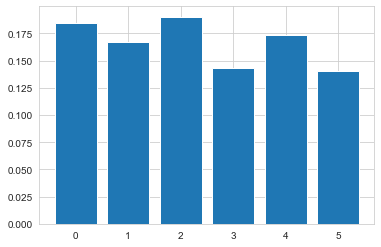

In [162]:
# random forest for feature importance on a regression problem
# define dataset
features = ['X1','X2','X3','X4','X5','X6']

X = df.loc[:, features]
y = df.loc[:, ['Y']]
# define the model
model = RandomForestRegressor()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

Text(0.5, 1.0, 'Feature Importance')

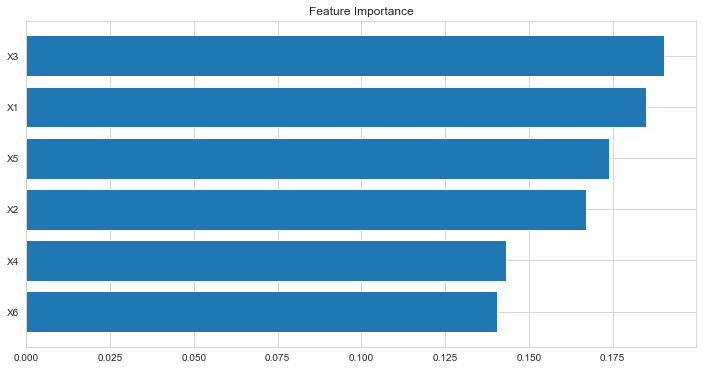

In [163]:
feature_importance = model.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_test.columns)[sorted_idx])
plt.title('Feature Importance')

## Modeling

In [164]:
# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [165]:
# Define the algorithms to use for modeling
model1 = LogisticRegression()
model2 = RandomForestClassifier()
model3 = AdaBoostClassifier(n_estimators=5)
model4 = KNeighborsClassifier()
model5 = SVC(kernel='linear')

In [166]:
# Train the model on the training set
model1.fit(X_train,y_train)
model2.fit(X_train,y_train)
model3.fit(X_train,y_train)
model4.fit(X_train,y_train)
model5.fit(X_train,y_train)

C:\Users\Tooman\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Tooman\AppData\Local\Temp/ipykernel_2864/429074700.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model2.fit(X_train,y_train)
C:\Users\Tooman\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Tooman\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

SVC(kernel='linear')

In [167]:
# Prediction for test
y_pred1 = model1.predict(X_test)
y_pred2 = model2.predict(X_test)
y_pred3 = model3.predict(X_test)
y_pred4 = model4.predict(X_test)
y_pred5 = model5.predict(X_test)

In [168]:
# Check for model accuracy
print(model1.score(X_test,y_test)) #Logistic Regression
print(model2.score(X_test,y_test)) #Random Forest Classifier
print(model3.score(X_test,y_test)) #AdaBoost Classifier
print(model4.score(X_test,y_test)) #KNearest Neighbors Classifier
print(model5.score(X_test,y_test)) #Support Vector Classifier

0.53125
0.71875
0.59375
0.5625
0.5625


In [169]:
# Create classification Report

In [171]:
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.55      0.38      0.44        16
           1       0.52      0.69      0.59        16

    accuracy                           0.53        32
   macro avg       0.53      0.53      0.52        32
weighted avg       0.53      0.53      0.52        32



In [172]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.73      0.69      0.71        16
           1       0.71      0.75      0.73        16

    accuracy                           0.72        32
   macro avg       0.72      0.72      0.72        32
weighted avg       0.72      0.72      0.72        32



In [173]:
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.62      0.50      0.55        16
           1       0.58      0.69      0.63        16

    accuracy                           0.59        32
   macro avg       0.60      0.59      0.59        32
weighted avg       0.60      0.59      0.59        32



In [174]:
print(classification_report(y_test, y_pred4))

              precision    recall  f1-score   support

           0       0.62      0.31      0.42        16
           1       0.54      0.81      0.65        16

    accuracy                           0.56        32
   macro avg       0.58      0.56      0.53        32
weighted avg       0.58      0.56      0.53        32



In [175]:
print(classification_report(y_test, y_pred5))

              precision    recall  f1-score   support

           0       0.58      0.44      0.50        16
           1       0.55      0.69      0.61        16

    accuracy                           0.56        32
   macro avg       0.57      0.56      0.56        32
weighted avg       0.57      0.56      0.56        32

